## Data Preprocessing

### Installing the libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Getting training data

In [70]:
dataset_pkn = pd.read_csv('pkn.txt', sep=",")
dataset_pkn.head(10)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,19991126,0,14.5689,14.6977,14.0412,14.4983,1.661789e+07,0
1,PKN,D,19991129,0,14.4315,14.4983,14.1720,14.2397,5.763073e+06,0
2,PKN,D,19991130,0,14.3704,14.6281,14.3704,14.4983,3.444817e+06,0
3,PKN,D,19991201,0,14.6281,14.9563,14.4983,14.9563,3.225432e+06,0
4,PKN,D,19991202,0,15.0937,15.5508,15.0241,15.2235,3.462556e+06,0
5,PKN,D,19991203,0,15.2235,15.4821,15.0937,15.4191,2.471058e+06,0
6,PKN,D,19991206,0,15.5508,16.0756,15.5508,16.0079,3.149244e+06,0
7,PKN,D,19991207,0,15.9458,16.0079,15.7474,15.7474,2.542669e+06,0
8,PKN,D,19991208,0,15.7474,16.1367,15.7474,15.8771,3.990032e+06,0
9,PKN,D,19991209,0,15.8771,15.8771,15.4821,15.7474,2.634010e+06,0


In [71]:
pkn_stock_price = dataset_pkn.iloc[:, 4:5]

### Spliting the dataset into the training set and the testing set

In [72]:
t = len(pkn_stock_price.values)
training_set, testing_set = pkn_stock_price.values[0:int(t*0.8)], pkn_stock_price.values[int(0.8*t):]

### Normalizing data

In [73]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
testing_set = sc.transform(testing_set)

In [74]:
X_train = []
y_train = []

for i in range(100, len(training_set)):
    X_train.append(training_set[i-100:i])
    y_train.append(training_set[i])

X_train = np.array(X_train)
y_train =  np.array(y_train)

In [75]:
X_test = []
y_test = []

total_set = np.concatenate((training_set, testing_set))

for i in range(len(training_set), len(total_set)):
    X_test.append(total_set[i-100:i])
    y_test.append(total_set[i])

X_test = np.array(X_test)
y_test =  np.array(y_test)

## RNN

In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D

In [77]:
regressor = Sequential()

regressor.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Conv1D(75, 10, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Conv1D(75, 10, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Conv1D(75, 10, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=75))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [78]:
regressor.compile(loss='mse', optimizer='adam')

In [79]:
hist = regressor.fit(X_train, y_train, epochs=50)

Epoch 1/50


2023-02-20 13:08:37.836460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.236076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.362821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.488037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.599262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.719290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 13:08:38.892067: I tensorflow/core/grappler/optimizers/cust

143/143 [==============================] - 16s 79ms/step - loss: 0.0048
Epoch 2/50
143/143 [==============================] - 10s 73ms/step - loss: 0.0016
Epoch 3/50
143/143 [==============================] - 10s 71ms/step - loss: 0.0011
Epoch 4/50
143/143 [==============================] - 10s 70ms/step - loss: 9.6688e-04
Epoch 5/50
143/143 [==============================] - 10s 70ms/step - loss: 9.4102e-04
Epoch 6/50
143/143 [==============================] - 10s 70ms/step - loss: 6.3411e-04
Epoch 7/50
143/143 [==============================] - 10s 70ms/step - loss: 5.9805e-04
Epoch 8/50
143/143 [==============================] - 10s 69ms/step - loss: 6.4264e-04
Epoch 9/50
143/143 [==============================] - 10s 70ms/step - loss: 4.8165e-04
Epoch 10/50
143/143 [==============================] - 10s 70ms/step - loss: 5.1838e-04
Epoch 11/50
143/143 [==============================] - 10s 71ms/step - loss: 6.1887e-04
Epoch 12/50
143/143 [==============================] - 11s 74ms/

### Visualisation of the training process

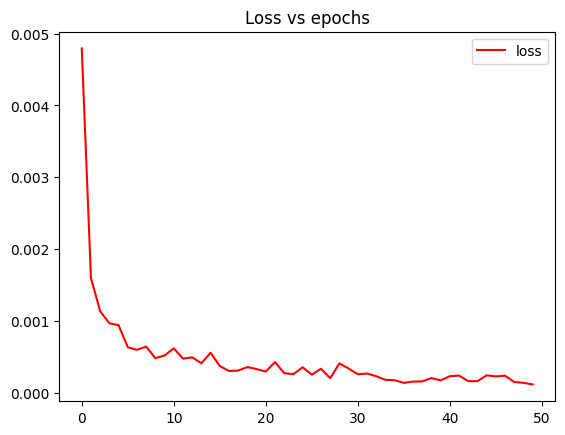

In [80]:
plt.plot(hist.history['loss'], label="loss", color='red')
plt.title('Loss vs epochs')
plt.legend()
plt.show()

## Predictions

In [83]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(y_test)

37/37 [==============================] - 1s 39ms/step


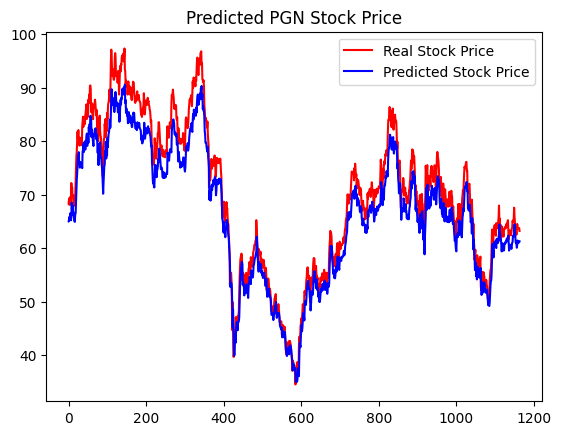

In [84]:
plt.plot(real_stock_price, label="Real Stock Price", color='red')
plt.plot(predicted_stock_price, label="Predicted Stock Price", color='blue')
plt.title('Predicted PGN Stock Price')
plt.legend()
plt.show()